# Linear Regression

## Load Dataset from sklearn

In [1]:
!pip install matplotlib seaborn pandas sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.read_csv("BostonHousing.csv")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [5]:
boston = pd.read_csv("BostonHousing.csv")

In [7]:
df = boston.copy()

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

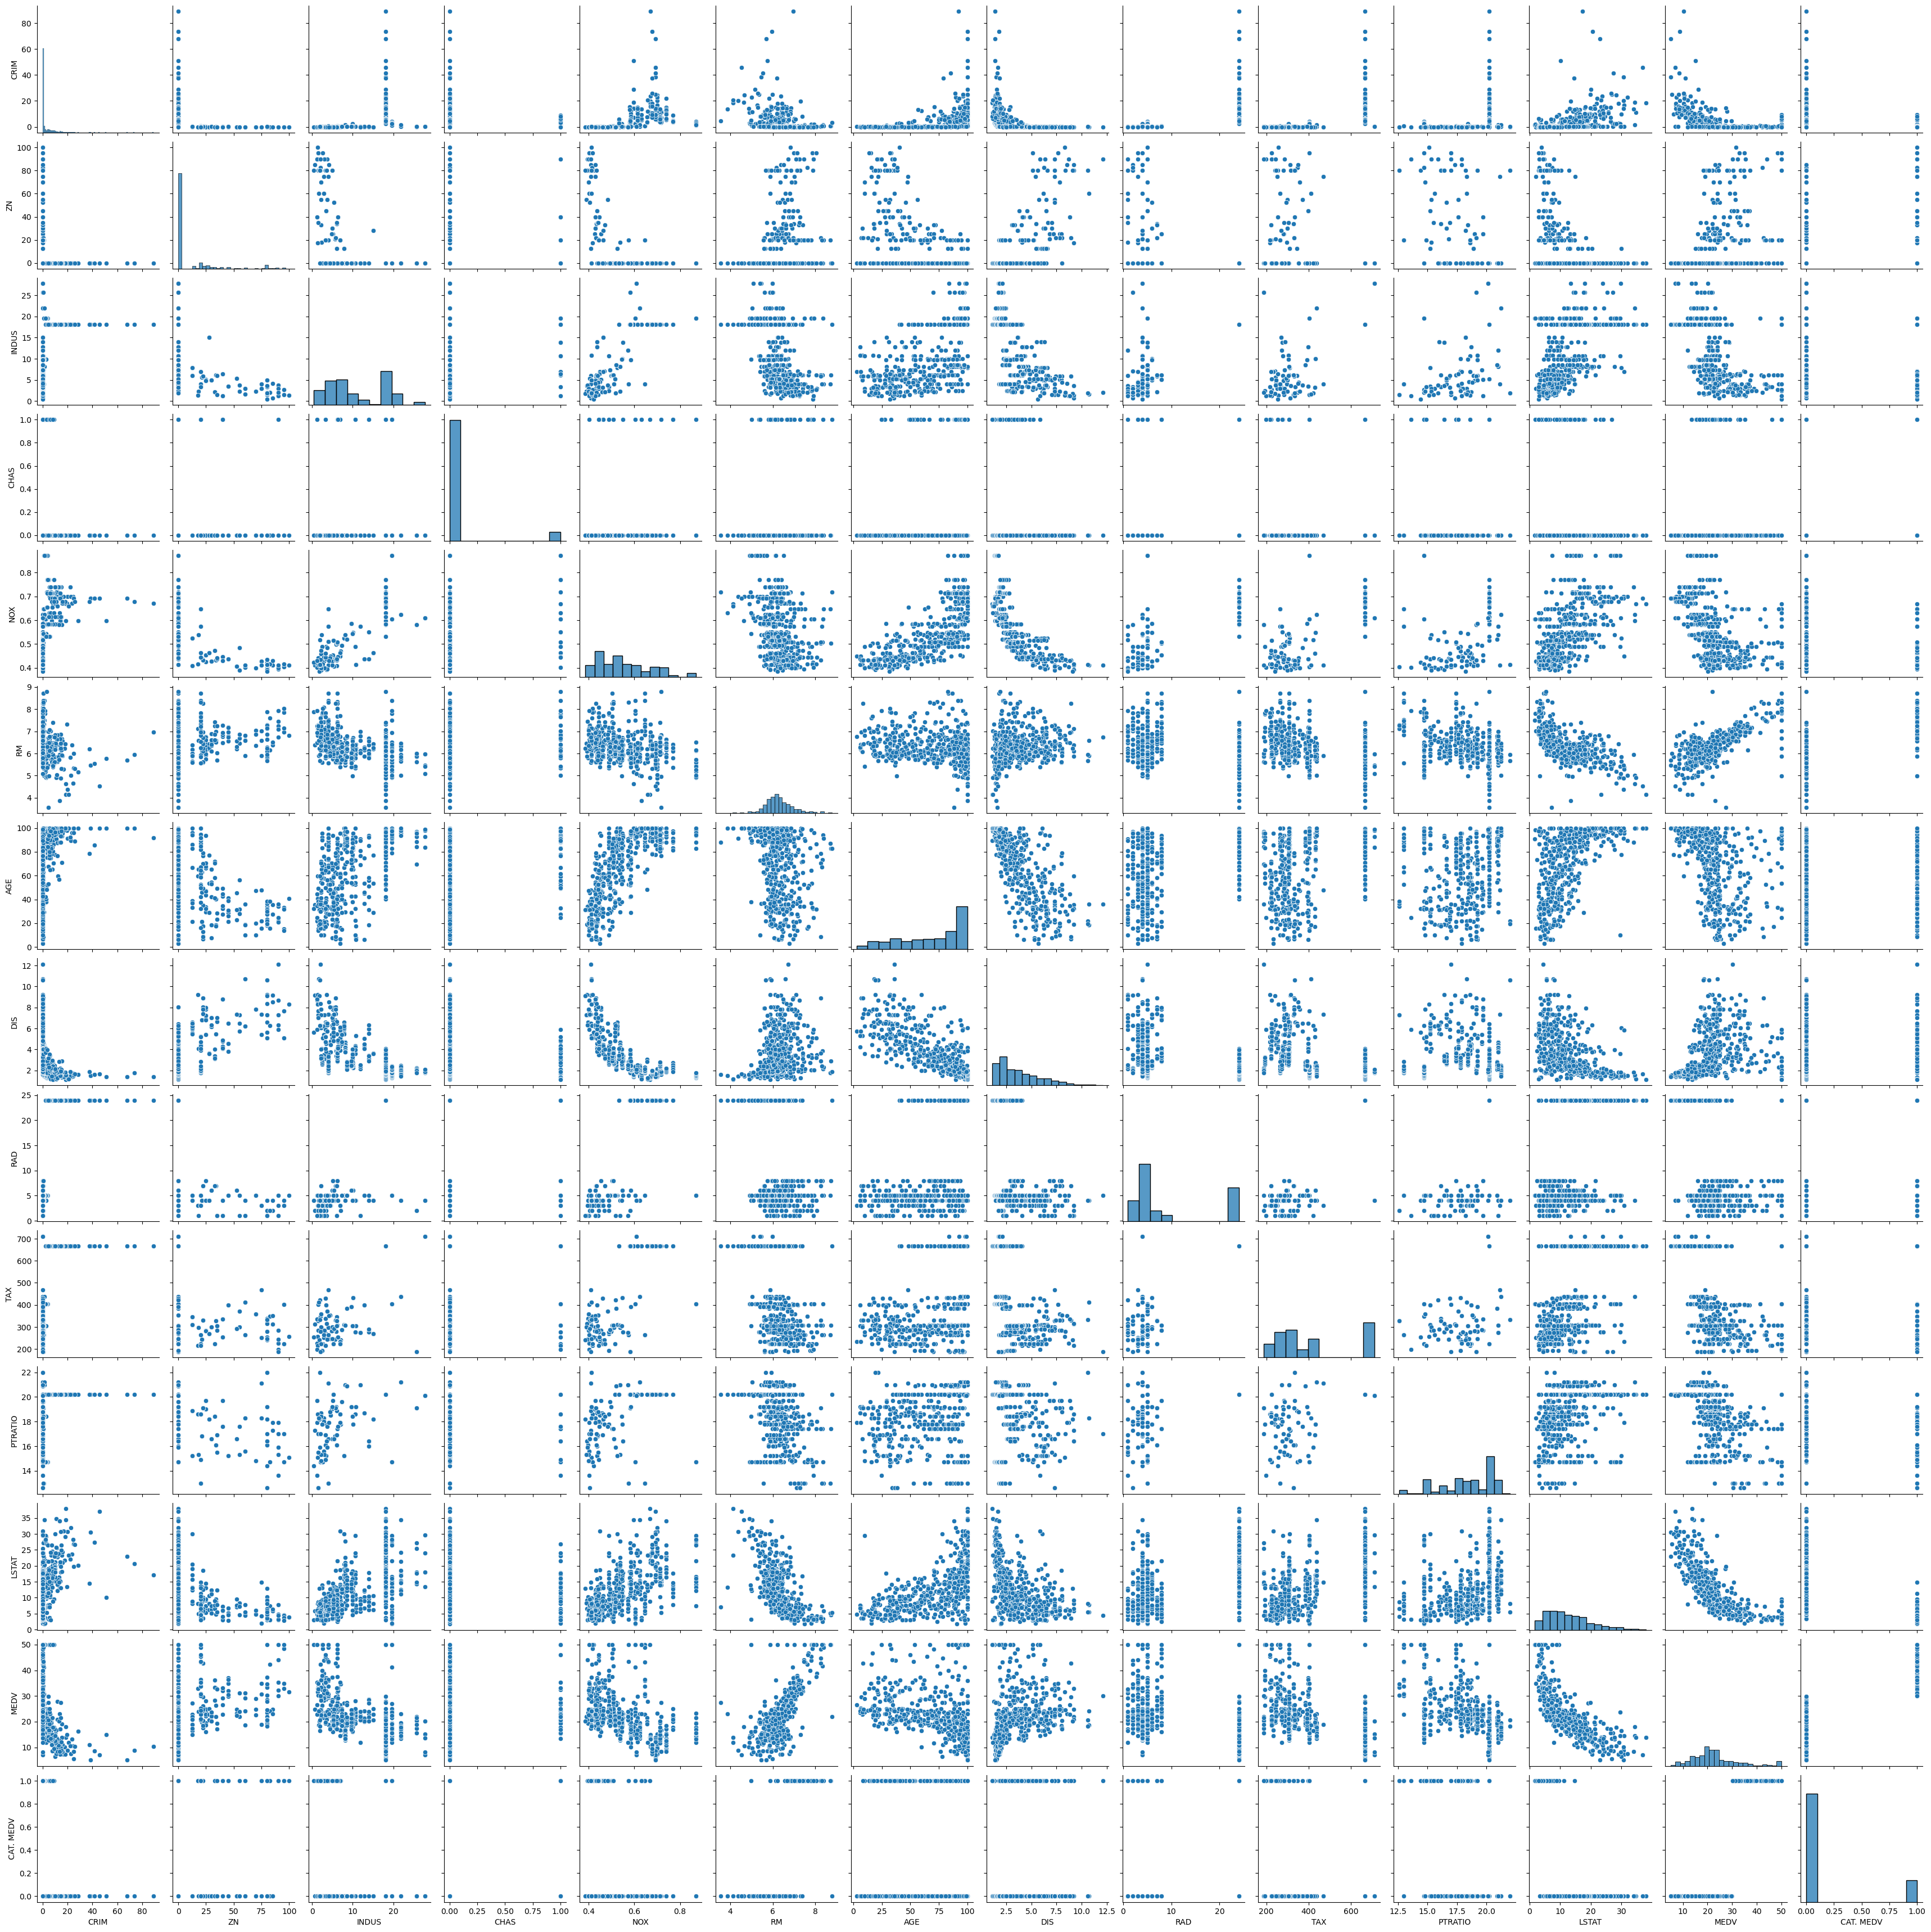

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [11]:
cols = ["MEDV", "INDUS", "RM", "LSTAT", "NOX", "DIS"]

In [12]:
df[cols]

,MEDV,INDUS,RM,LSTAT,NOX,DIS
0,24.0,2.31,6.575,4.98,0.538,4.0900
1,21.6,7.07,6.421,9.14,0.469,4.9671
2,34.7,7.07,7.185,4.03,0.469,4.9671
3,33.4,2.18,6.998,2.94,0.458,6.0622
4,36.2,2.18,7.147,5.33,0.458,6.0622
...,...,...,...,...,...,...
501,22.4,11.93,6.593,9.67,0.573,2.4786
502,20.6,11.93,6.120,9.08,0.573,2.2875
503,23.9,11.93,6.976,5.64,0.573,2.1675
504,22.0,11.93,6.794,6.48,0.573,2.3889


In [13]:
df[cols].describe()

,MEDV,INDUS,RM,LSTAT,NOX,DIS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,11.136779,6.284634,12.653063,0.554695,3.795043
std,9.197104,6.860353,0.702617,7.141062,0.115878,2.105710
min,5.000000,0.460000,3.561000,1.730000,0.385000,1.129600
25%,17.025000,5.190000,5.885500,6.950000,0.449000,2.100175
50%,21.200000,9.690000,6.208500,11.360000,0.538000,3.207450
75%,25.000000,18.100000,6.623500,16.955000,0.624000,5.188425
max,50.000000,27.740000,8.780000,37.970000,0.871000,12.126500


c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

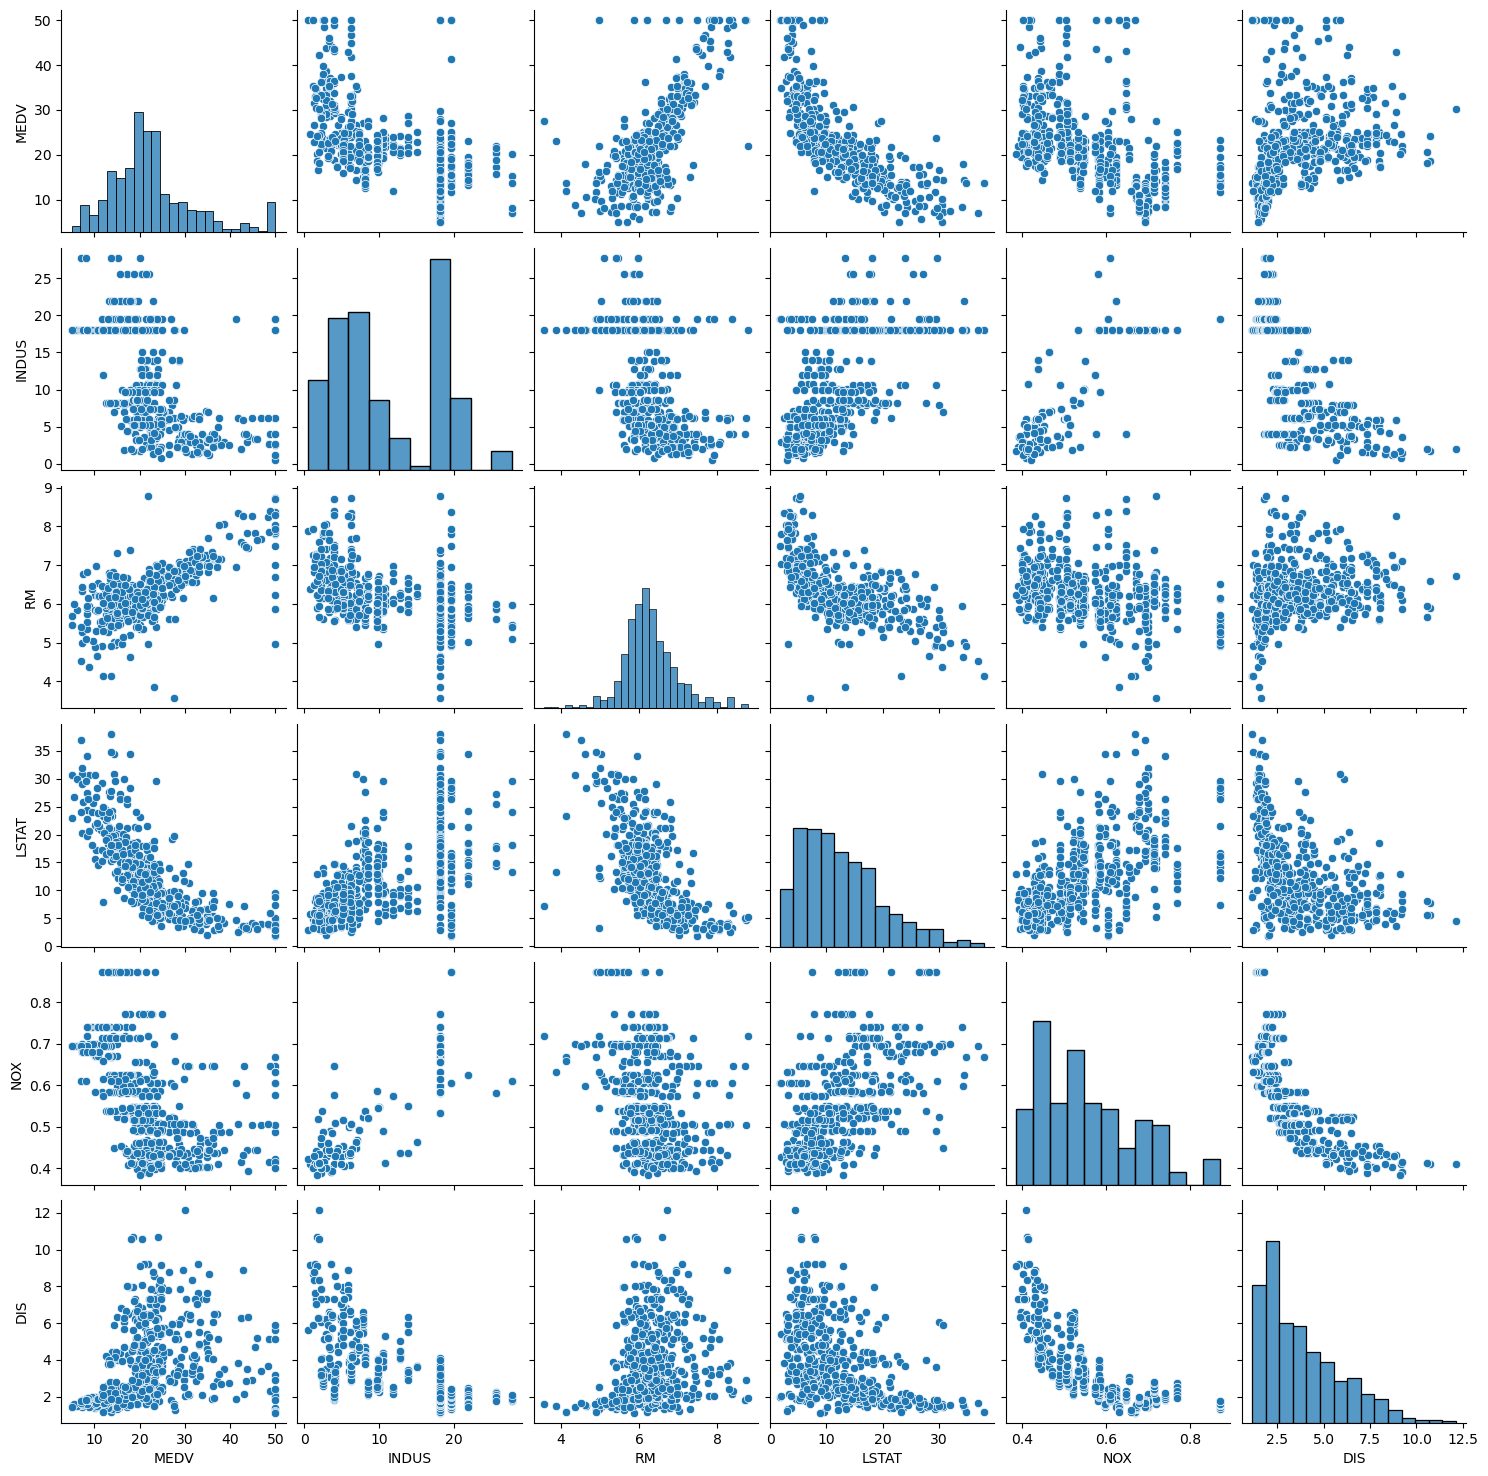

In [14]:
sns.pairplot(df[cols])
plt.show()

## Train Linear Model with PyTorch

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
df_cols = df[cols]

In [17]:
df_cols.values

array([[24.    ,  2.31  ,  6.575 ,  4.98  ,  0.538 ,  4.09  ],
       [21.6   ,  7.07  ,  6.421 ,  9.14  ,  0.469 ,  4.9671],
       [34.7   ,  7.07  ,  7.185 ,  4.03  ,  0.469 ,  4.9671],
       ...,
       [23.9   , 11.93  ,  6.976 ,  5.64  ,  0.573 ,  2.1675],
       [22.    , 11.93  ,  6.794 ,  6.48  ,  0.573 ,  2.3889],
       [11.9   , 11.93  ,  6.03  ,  7.88  ,  0.573 ,  2.505 ]])

In [18]:
torch.from_numpy(df_cols.values).float()

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [19]:
data = torch.from_numpy(df_cols.values).float()

data.shape

torch.Size([506, 6])

In [21]:
data

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [31]:
# Split x and y.
y = data[:, :1]
x = data[:, 1:]

print(y)

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000],
        [28.7000],
        [22.9000],
        [27.1000],
        [16.5000],
        [18.9000],
        [15.0000],
        [18.9000],
        [21.7000],
        [20.4000],
        [18.2000],
        [19.9000],
        [23.1000],
        [17.5000],
        [20.2000],
        [18.2000],
        [13.6000],
        [19.6000],
        [15.2000],
        [14.5000],
        [15.6000],
        [13.9000],
        [16.6000],
        [14.8000],
        [18.4000],
        [21.0000],
        [12.7000],
        [14.5000],
        [13.2000],
        [13.1000],
        [13.5000],
        [18.9000],
        [20.0000],
        [21.0000],
        [24.7000],
        [30.8000],
        [34.9000],
        [26.6000],
        [25.3000],
        [24.7000],
        [21.2000],
        [19.3000],
        [20.0000],
        [16.6000],
        [14.4000],
        [19.4000],
        [19.7000],
        [20.5000],
        [25.

In [32]:
print(x)

tensor([[ 2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [ 7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [ 7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])


In [33]:
print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [34]:
# Define configurations.
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [39]:
x.size()

torch.Size([506, 5])

In [41]:
x.size(-1)

5

In [40]:
y.size()

torch.Size([506, 1])

In [42]:
y.size(-1)

1

In [35]:
# Define model.
model = nn.Linear(x.size(-1), y.size(-1))

model

Linear(in_features=5, out_features=1, bias=True)

In [43]:
model.parameters()

<generator object Module.parameters at 0x0000023064D77CA0>

In [36]:
# Instead of implement gradient equation,
# we can use <optim class> to update model parameters, automatically.
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [37]:
# Whole training samples are used in 1 epoch.
# Thus, "N epochs" means that model saw a sample N-times.
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad() # gradient 0으로 초기화 
    loss.backward()
    
    optimizer.step()
    
    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 100: loss=4.2344e+01
Epoch 200: loss=3.6416e+01
Epoch 300: loss=3.3162e+01
Epoch 400: loss=3.1329e+01
Epoch 500: loss=3.0295e+01
Epoch 600: loss=2.9712e+01
Epoch 700: loss=2.9383e+01
Epoch 800: loss=2.9198e+01
Epoch 900: loss=2.9093e+01
Epoch 1000: loss=2.9033e+01
Epoch 1100: loss=2.8999e+01
Epoch 1200: loss=2.8980e+01
Epoch 1300: loss=2.8969e+01
Epoch 1400: loss=2.8962e+01
Epoch 1500: loss=2.8958e+01
Epoch 1600: loss=2.8956e+01
Epoch 1700: loss=2.8954e+01
Epoch 1800: loss=2.8953e+01
Epoch 1900: loss=2.8952e+01
Epoch 2000: loss=2.8951e+01


## Let's see the result!

c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


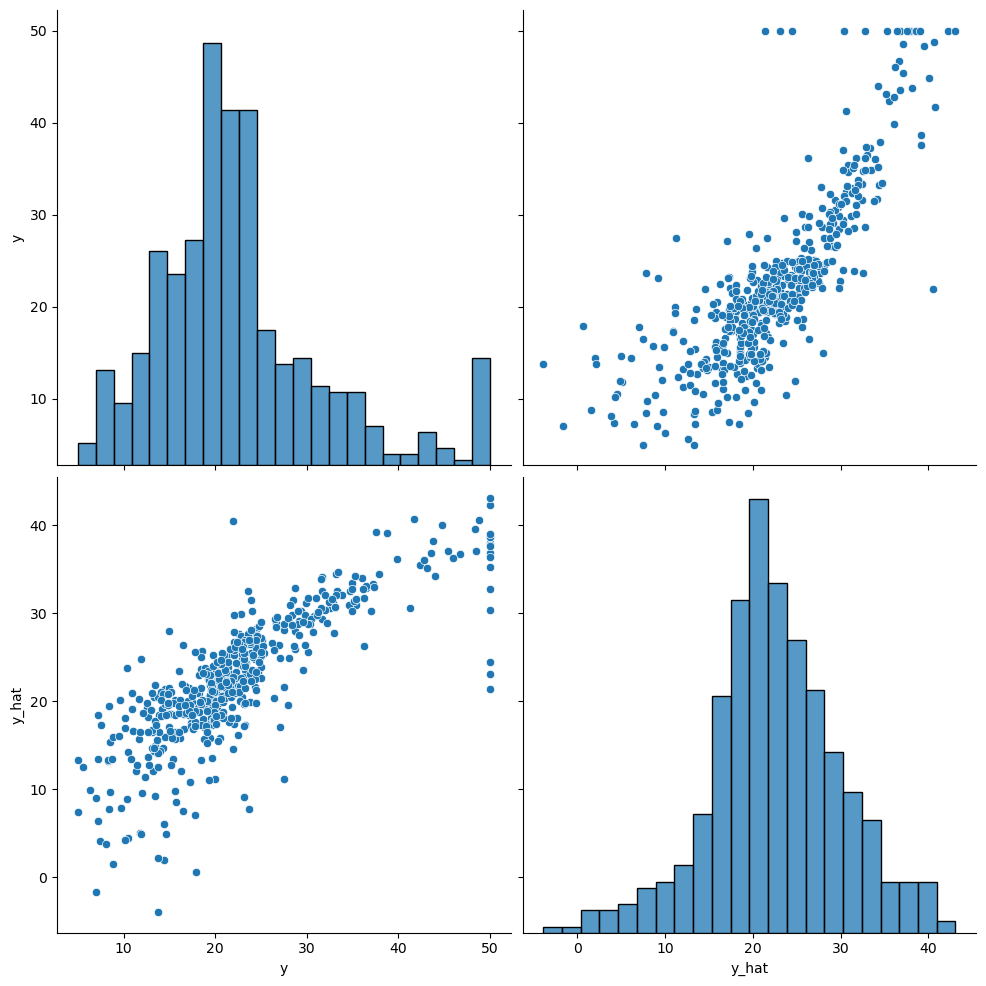

In [38]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(),
                  columns=["y", "y_hat"])

# dim=1 (열 방향)
# detach : tensor를 계산 그래프에서 분리 
# (왜? tensor를 모델 학습에 사용하지 않을 거기 때문)
# 왜? numpy() 변환 : 분리된 텐서를 Pandas 데이터프레임에서 사용할 수 있도록 
sns.pairplot(df, height=5)
plt.show()